### **Project 2: Ames Housing Data and Kaggle Challenge**

# Log of the Baseline Model

- [Imports](#Imports)
- [Feature Selection](#Feature-Selection)
- [Model Evaluation](#Model-Evaluation)
- [Submit Predicitons](#Submit-Predictions)

## Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from modules.model_executor import run_model, submit_a_kaggle

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)

## Read in Cleaned data

In [32]:
train = pd.read_csv('./datasets/cleaned_training_data.csv')
test = pd.read_csv('./datasets/cleaned_testing_data.csv')

In [33]:
# drop the Unnamed: 0 and pid columns
train.drop(columns=['Unnamed: 0', 'pid'], inplace=True)
test.drop(columns=['Unnamed: 0', 'pid'], inplace=True)

## Feature Selection

In [34]:
features = list(train.corr()['saleprice'][train.corr()['saleprice'].abs() > 0.5].sort_values(ascending=False).index)

In [35]:
features.remove('saleprice')
features.remove('garage_yr_blt')
features.remove('mas_vnr_area')

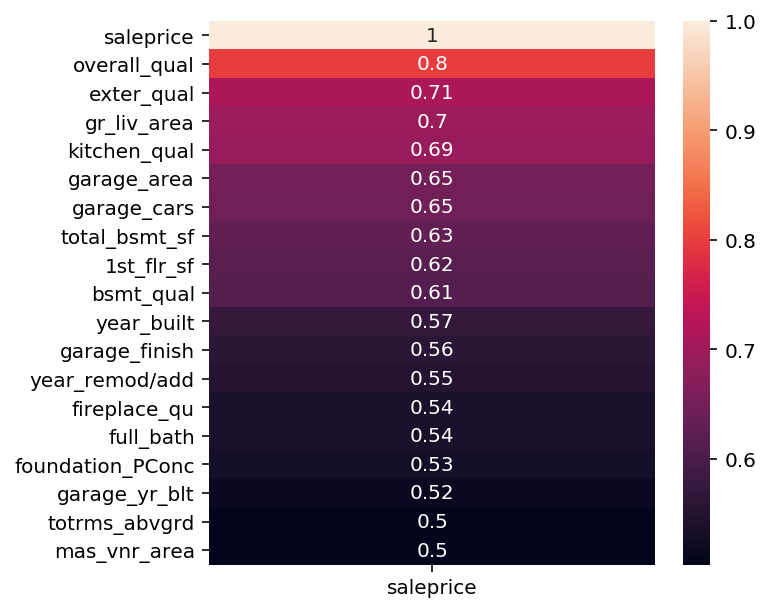

In [36]:
plt.figure(figsize=(5, 5))
sns.heatmap(train.corr()[['saleprice']][train.corr()['saleprice'].abs() > 0.5].sort_values(by='saleprice', ascending=False), annot=True);

#### Create and visualize a log saleprice column

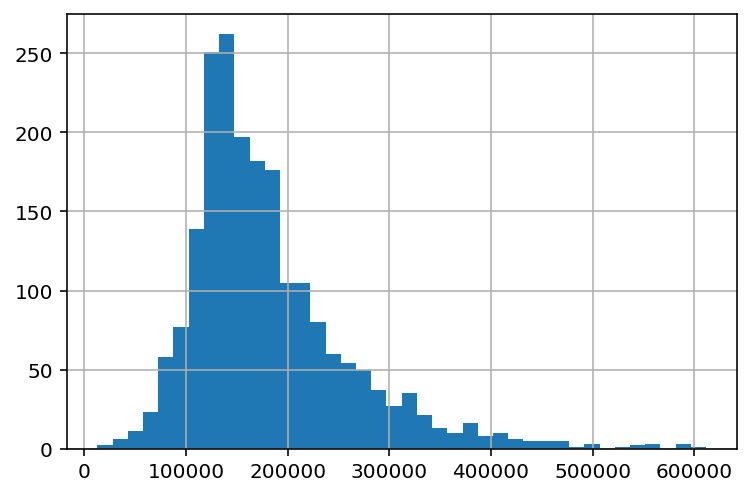

In [37]:
train['saleprice'].hist(bins=40);

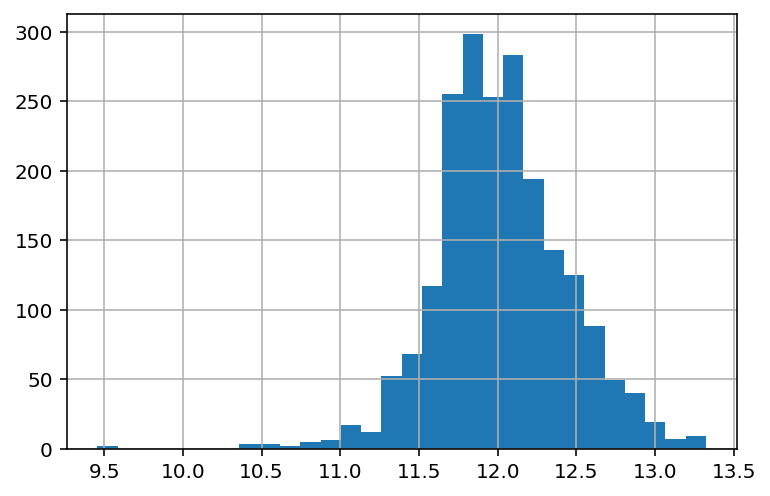

In [38]:
train['log_saleprice'] = train['saleprice'].map(np.log)
train['log_saleprice'].hist(bins=30);

**make a log 1st floor square foot column**

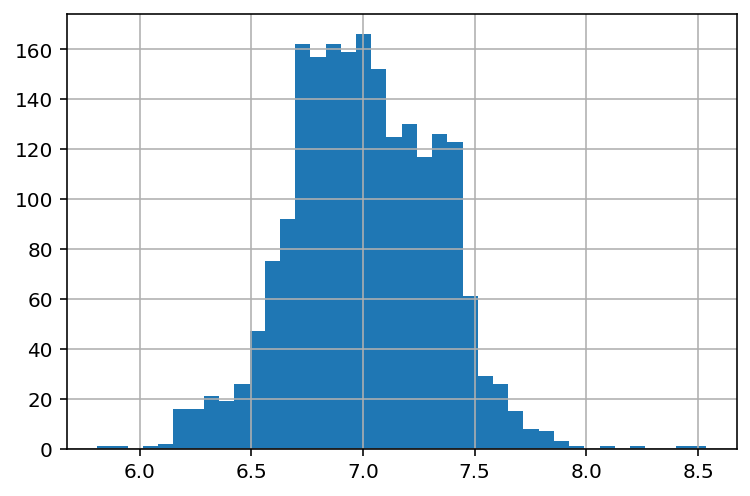

In [39]:
train['log_1st_flr_sf'] = train['1st_flr_sf'].map(np.log)
test['log_1st_flr_sf'] = test['1st_flr_sf'].map(np.log)
train['log_1st_flr_sf'].hist(bins=40);

**make a log ground living area column**

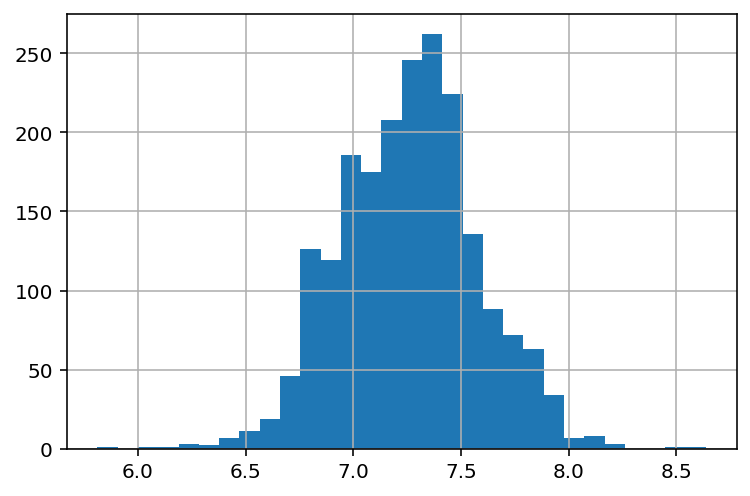

In [40]:
train['log_gr_liv_area'] = train['gr_liv_area'].map(np.log)
test['log_gr_liv_area'] = test['gr_liv_area'].map(np.log)
train['log_gr_liv_area'].hist(bins=30);

### Check if other features are right skewed

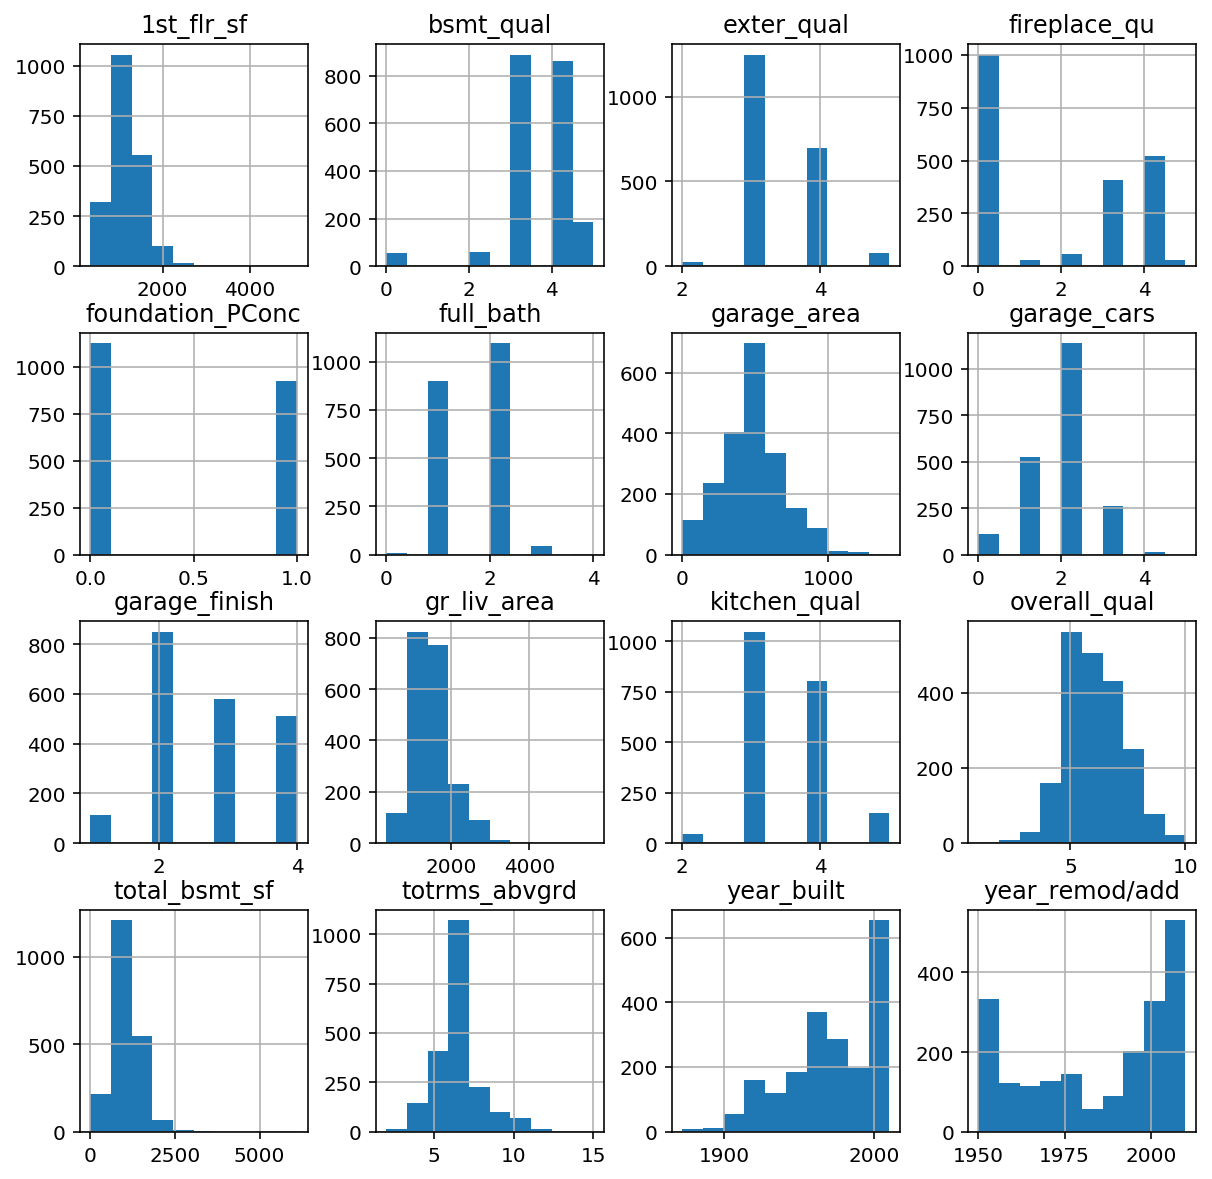

In [41]:
train.loc[:, features].hist(figsize=(10,10));

**Now Create a new features2 list to add the log columns to**

In [42]:
features2 = features

In [43]:
features2.append('log_1st_flr_sf')
features2.append('log_gr_liv_area')
features2.remove('1st_flr_sf')
features2.remove('gr_liv_area')

In [44]:
features2

['overall_qual',
 'exter_qual',
 'kitchen_qual',
 'garage_area',
 'garage_cars',
 'total_bsmt_sf',
 'bsmt_qual',
 'year_built',
 'garage_finish',
 'year_remod/add',
 'fireplace_qu',
 'full_bath',
 'foundation_PConc',
 'totrms_abvgrd',
 'log_1st_flr_sf',
 'log_gr_liv_area']

## Model Evaluation

In [45]:
X = train[features2]
y = train['log_saleprice']
z = test[features2]

In [57]:
import warnings
warnings.simplefilter(action="ignore")
z['id'] = test.loc[:, ['id']].copy()

In [49]:
pred_df, train_preds, y_train, kaggle = run_model(X, y, z, 'loglr')

Cross Val Scores: [0.87934526 0.79947295 0.80875054 0.84615343 0.83247232]
  Cross Val Mean: 0.8332389007893782


In [50]:
pred_df

,Key Metrics,Train,Test
0,R2,0.84060,0.87521
1,R2_adj,0.83892,0.87119
2,MAE,0.11156,0.10706
3,MSE,1077013090.29246,728023309.51610
4,RMSE,32817.87760,26981.90708


### Plot True vs Predicted Values

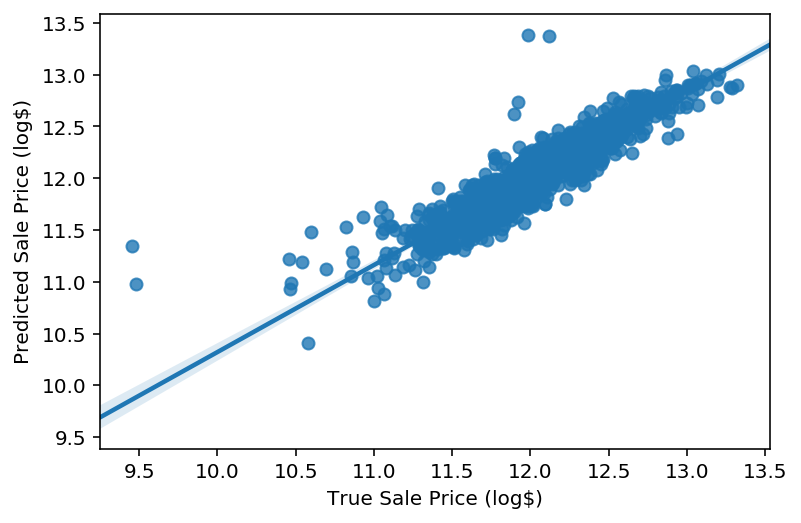

In [52]:
sns.regplot(y_train, train_preds)
plt.xlabel('True Sale Price (log$)')
plt.ylabel('Predicted Sale Price (log$)');

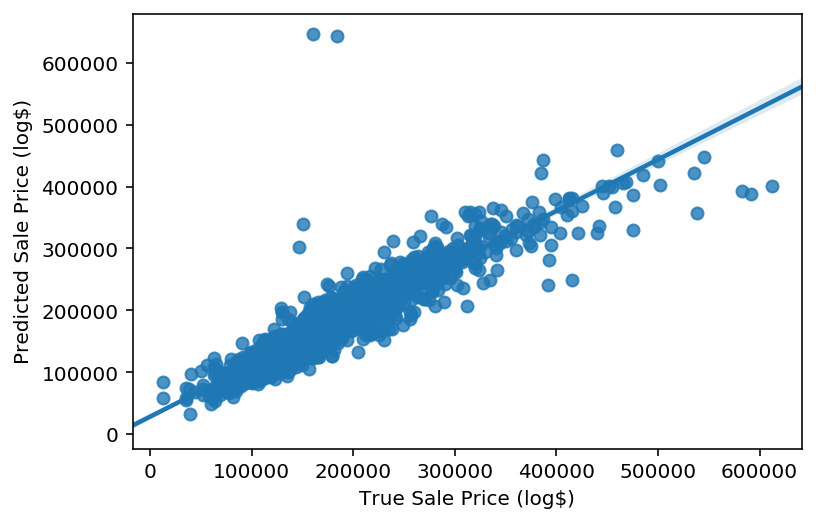

In [53]:
sns.regplot(np.exp(y_train), np.exp(train_preds))
plt.xlabel('True Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)');

#### The score improved! There alse appear to be two outliers that were greatly overpredicted, these should be investigated further.

## Submit Predictions

In [55]:
kaggle.head()

,Id,SalePrice
0,2658,120201.576831
1,2718,188165.357664
2,2414,194190.166550
3,1989,117913.261282
4,625,176167.124503


In [56]:
submit_a_kaggle(kaggle, 2)